In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, glob
from colorama import Fore, Back, Style

In [104]:
# Lecture des CSV dans un DF

fns=glob.glob('fao_2013/*.csv')
cols = ['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'src']
dfall=pd.DataFrame(data=[], columns=cols)
print(dfall)
produits={} # liste des produits par fichier
print('--------------')
for fn in fns:
    df=pd.read_csv(fn, 
                names=cols[:14],
                header=0,
                #index_col='Code Pays', 
                dtype={'Code Élément': str,'Code Produit':str, 'Code Année':str}
               )
    src=fn[22:-4]
    print(Fore.RED, fn, Style.RESET_ALL, df.shape)
    print(Fore.BLUE, 'Produits:', Style.RESET_ALL, df.Produit.unique())
    produits[src] = df.Produit.unique()
    print(Fore.BLUE, 'Élément:', Style.RESET_ALL, df.Élément.unique())
    df['src']=src
    dfall = pd.concat([dfall, df])
    #print(df[['Code Pays','Pays']].head(5))

print('---------------------')
print(produits)
print('---------------------')
print(dfall.shape)

Empty DataFrame
Columns: [Code Domaine, Domaine, Code Pays, Pays, Code Élément, Élément, Code Produit, Produit, Code Année, Année, Unité, Valeur, Symbole, Description du Symbole, src]
Index: []
--------------
 fao_2013/FAOSTAT_2013_animal.csv  (37166, 14)
 Produits:  ['Viande de Bovins' "Viande d'Ovins/Caprins" 'Viande de Volailles'
 'Viande, Autre' 'Abats Comestible' 'Beurre, Ghee' 'Crème'
 'Graisses Animales Crue' 'Oeufs' 'Lait - Excl Beurre'
 'Poissons Eau Douce' 'Viande de Suides' 'Huiles de Poissons'
 'Huiles de Foie de Poisso' 'Perciform' 'Poissons Pelagiques'
 'Poissons Marins, Autres' 'Crustacés' 'Cephalopodes' 'Mollusques, Autres'
 'Animaux Aquatiques Autre' 'Plantes Aquatiques' 'Viande de Anim Aquatiq']
 Élément:  ['Production' 'Importations - Quantité' 'Disponibilité intérieure'
 'Nourriture' 'Disponibilité alimentaire en quantité (kg/personne/an)'
 'Disponibilité alimentaire (Kcal/personne/jour)'
 'Disponibilité de protéines en quantité (g/personne/jour)'
 'Disponibilité de

In [105]:
dfall

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole,src
0,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées,animal
1,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées,animal
2,FBS,Bilans Alimentaires,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,animal
3,FBS,Bilans Alimentaires,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,animal
4,FBS,Bilans Alimentaires,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Fc,Donnée calculée,animal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,FBS,Food Balance Sheets,237,Viet Nam,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,91680.00,NaN,Official data,population
171,FBS,Food Balance Sheets,249,Yemen,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,24407.00,NaN,Official data,population
172,FBS,Food Balance Sheets,251,Zambia,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,14539.00,NaN,Official data,population
173,FBS,Food Balance Sheets,181,Zimbabwe,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,14150.00,NaN,Official data,population


In [106]:
dfall.dtypes

Code Domaine               object
Domaine                    object
Code Pays                  object
Pays                       object
Code Élément               object
Élément                    object
Code Produit               object
Produit                    object
Code Année                 object
Année                      object
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
src                        object
dtype: object

In [107]:
# Codes pays
for x in (dfall['Code Pays'].astype(str)+": "+dfall['Pays']).unique():
    print(x)

2: Afghanistan
202: Afrique du Sud
3: Albanie
4: Algérie
79: Allemagne
7: Angola
8: Antigua-et-Barbuda
194: Arabie saoudite
9: Argentine
1: Arménie
10: Australie
11: Autriche
52: Azerbaïdjan
12: Bahamas
16: Bangladesh
14: Barbade
57: Bélarus
255: Belgique
23: Belize
53: Bénin
17: Bermudes
19: Bolivie (État plurinational de)
80: Bosnie-Herzégovine
20: Botswana
21: Brésil
26: Brunéi Darussalam
27: Bulgarie
233: Burkina Faso
35: Cabo Verde
115: Cambodge
32: Cameroun
33: Canada
40: Chili
96: Chine - RAS de Hong-Kong
128: Chine - RAS de Macao
41: Chine, continentale
214: Chine, Taiwan Province de
50: Chypre
44: Colombie
46: Congo
48: Costa Rica
107: Côte d'Ivoire
98: Croatie
49: Cuba
54: Danemark
72: Djibouti
55: Dominique
59: Égypte
60: El Salvador
225: Émirats arabes unis
58: Équateur
203: Espagne
63: Estonie
231: États-Unis d'Amérique
238: Éthiopie
185: Fédération de Russie
66: Fidji
67: Finlande
68: France
74: Gabon
75: Gambie
73: Géorgie
81: Ghana
84: Grèce
86: Grenade
89: Guatemala
90

In [108]:
# Code Élément
for x in (dfall['Code Élément']+": "+dfall['Élément']).unique():
    print(x)

5511: Production
5611: Importations - Quantité
5301: Disponibilité intérieure
5142: Nourriture
645: Disponibilité alimentaire en quantité (kg/personne/an)
664: Disponibilité alimentaire (Kcal/personne/jour)
674: Disponibilité de protéines en quantité (g/personne/jour)
684: Disponibilité de matière grasse en quantité (g/personne/jour)
5527: Semences
5123: Pertes
5911: Exportations - Quantité
5521: Aliments pour animaux
5154: Autres Utilisations
5072: Variation de stock
5131: Traitement
6132: Valeur
511: Total Population - Both sexes


In [109]:
# Code Produit
for x in (dfall['Code Produit']+": "+dfall['Produit']).unique():
    print(x)

2731: Viande de Bovins
2732: Viande d'Ovins/Caprins
2734: Viande de Volailles
2735: Viande, Autre
2736: Abats Comestible
2740: Beurre, Ghee
2743: Crème
2737: Graisses Animales Crue
2744: Oeufs
2848: Lait - Excl Beurre
2761: Poissons Eau Douce
2733: Viande de Suides
2781: Huiles de Poissons
2782: Huiles de Foie de Poisso
2762: Perciform
2763: Poissons Pelagiques
2764: Poissons Marins, Autres
2765: Crustacés
2766: Cephalopodes
2767: Mollusques, Autres
2769: Animaux Aquatiques Autre
2775: Plantes Aquatiques
2768: Viande de Anim Aquatiq
21001: Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)
2511: Blé
2805: Riz (Eq Blanchi)
2513: Orge
2514: Maïs
2517: Millet
2520: Céréales, Autres
2515: Seigle
2516: Avoine
2518: Sorgho
2531: Pommes de Terre
2536: Sucre, canne
2537: Sucre, betterave
2542: Sucre Eq Brut
2543: Edulcorants Autres
2745: Miel
2549: Légumineuses Autres
2551: Noix
2557: Graines de tournesol
2559: Graines de coton
2560: Coco (Incl Coprah)
2561: Sésame
2563: Olives

In [110]:
dfall.head()

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole,src
0,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées,animal
1,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées,animal
2,FBS,Bilans Alimentaires,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,animal
3,FBS,Bilans Alimentaires,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,animal
4,FBS,Bilans Alimentaires,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Fc,Donnée calculée,animal


In [111]:
# Ajout colonne 'code'

dfall['code']=dfall['src']+'_'+ dfall['Code Produit']+'_'+ dfall['Code Élément']
#dfall['code2']=dfall['Code Produit']+'_'+ dfall['Code Élément']
dfall.head()

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole,src,code
0,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées,animal,animal_2731_5511
1,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées,animal,animal_2731_5611
2,FBS,Bilans Alimentaires,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,animal,animal_2731_5301
3,FBS,Bilans Alimentaires,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,animal,animal_2731_5142
4,FBS,Bilans Alimentaires,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Fc,Donnée calculée,animal,animal_2731_645


In [112]:
pivot = dfall.pivot_table(index=['Code Pays'], columns='code', values='Valeur') # mean
#pivot2 = dfall.pivot_table(index=['Code Pays'], columns='code2', values='Valeur') # mean
print('shape pivot', pivot.shape)
#print('shape pivot2', pivot2.shape)
pivot

shape pivot (175, 1450)


code,animal_2731_5072,animal_2731_5123,animal_2731_5131,animal_2731_5142,animal_2731_5154,animal_2731_5301,animal_2731_5511,animal_2731_5521,animal_2731_5611,animal_2731_5911,...,vegetal_2805_5527,vegetal_2805_5611,vegetal_2805_5911,vegetal_2805_645,vegetal_2805_664,vegetal_2805_674,vegetal_2805_684,vegetal_2899_664,vegetal_2899_674,vegetal_2899_684
Code Pays,,,,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,59.0,2.0,61.0,54.0,NaN,7.0,0.0,...,NaN,10.0,0.0,3.18,34.0,0.66,0.11,3.0,0.10,0.04
2,NaN,NaN,NaN,140.0,NaN,140.0,134.0,NaN,6.0,NaN,...,14.0,119.0,NaN,13.82,141.0,2.70,0.27,1.0,0.02,0.02
3,0.0,NaN,NaN,71.0,NaN,71.0,70.0,NaN,2.0,0.0,...,0.0,25.0,0.0,7.78,68.0,1.34,0.16,5.0,0.13,0.06
4,0.0,NaN,NaN,220.0,NaN,220.0,140.0,NaN,80.0,0.0,...,0.0,118.0,0.0,2.97,30.0,0.57,0.04,2.0,0.06,0.03
7,NaN,NaN,NaN,181.0,NaN,181.0,105.0,NaN,75.0,0.0,...,1.0,312.0,0.0,8.12,82.0,1.56,0.12,3.0,0.08,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.0,NaN,NaN,16.0,NaN,16.0,8.0,NaN,10.0,2.0,...,NaN,2.0,0.0,4.20,44.0,0.84,0.12,10.0,0.30,0.12
272,NaN,NaN,NaN,67.0,NaN,67.0,68.0,NaN,1.0,2.0,...,NaN,12.0,1.0,1.22,12.0,0.23,0.03,0.0,NaN,NaN
273,0.0,NaN,NaN,8.0,NaN,8.0,4.0,NaN,4.0,0.0,...,NaN,1.0,0.0,2.24,22.0,0.42,0.04,15.0,0.43,0.18


In [113]:
df.set_index('Code Pays')[['Pays']]

,Pays
Code Pays,
2,Afghanistan
3,Albania
4,Algeria
7,Angola
8,Antigua and Barbuda
...,...
237,Viet Nam
249,Yemen
251,Zambia


In [114]:
# Ajout de la colonne 'Pays' non présente dans pivot. récupération du DF 'df' (dernier lu)

#pivot.join()
pivot.index
pivot = df.set_index('Code Pays')[['Pays']].join(pivot, how='outer') # Outer pour éviter de perdre des pays...
pivot

,Pays,animal_2731_5072,animal_2731_5123,animal_2731_5131,animal_2731_5142,animal_2731_5154,animal_2731_5301,animal_2731_5511,animal_2731_5521,animal_2731_5611,...,vegetal_2805_5527,vegetal_2805_5611,vegetal_2805_5911,vegetal_2805_645,vegetal_2805_664,vegetal_2805_674,vegetal_2805_684,vegetal_2899_664,vegetal_2899_674,vegetal_2899_684
Code Pays,,,,,,,,,,,,,,,,,,,,,
1,Armenia,0.0,NaN,NaN,59.0,2.0,61.0,54.0,NaN,7.0,...,NaN,10.0,0.0,3.18,34.0,0.66,0.11,3.0,0.10,0.04
2,Afghanistan,NaN,NaN,NaN,140.0,NaN,140.0,134.0,NaN,6.0,...,14.0,119.0,NaN,13.82,141.0,2.70,0.27,1.0,0.02,0.02
3,Albania,0.0,NaN,NaN,71.0,NaN,71.0,70.0,NaN,2.0,...,0.0,25.0,0.0,7.78,68.0,1.34,0.16,5.0,0.13,0.06
4,Algeria,0.0,NaN,NaN,220.0,NaN,220.0,140.0,NaN,80.0,...,0.0,118.0,0.0,2.97,30.0,0.57,0.04,2.0,0.06,0.03
7,Angola,NaN,NaN,NaN,181.0,NaN,181.0,105.0,NaN,75.0,...,1.0,312.0,0.0,8.12,82.0,1.56,0.12,3.0,0.08,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,Luxembourg,0.0,NaN,NaN,16.0,NaN,16.0,8.0,NaN,10.0,...,NaN,2.0,0.0,4.20,44.0,0.84,0.12,10.0,0.30,0.12
272,Serbia,NaN,NaN,NaN,67.0,NaN,67.0,68.0,NaN,1.0,...,NaN,12.0,1.0,1.22,12.0,0.23,0.03,0.0,NaN,NaN
273,Montenegro,0.0,NaN,NaN,8.0,NaN,8.0,4.0,NaN,4.0,...,NaN,1.0,0.0,2.24,22.0,0.42,0.04,15.0,0.43,0.18


In [115]:
pivot.drop([351], inplace=True) # enlève la Chine, en double

pivot.to_csv('pivot.csv')
pivot.shape

(174, 1451)

# Missingno

<Axes: >

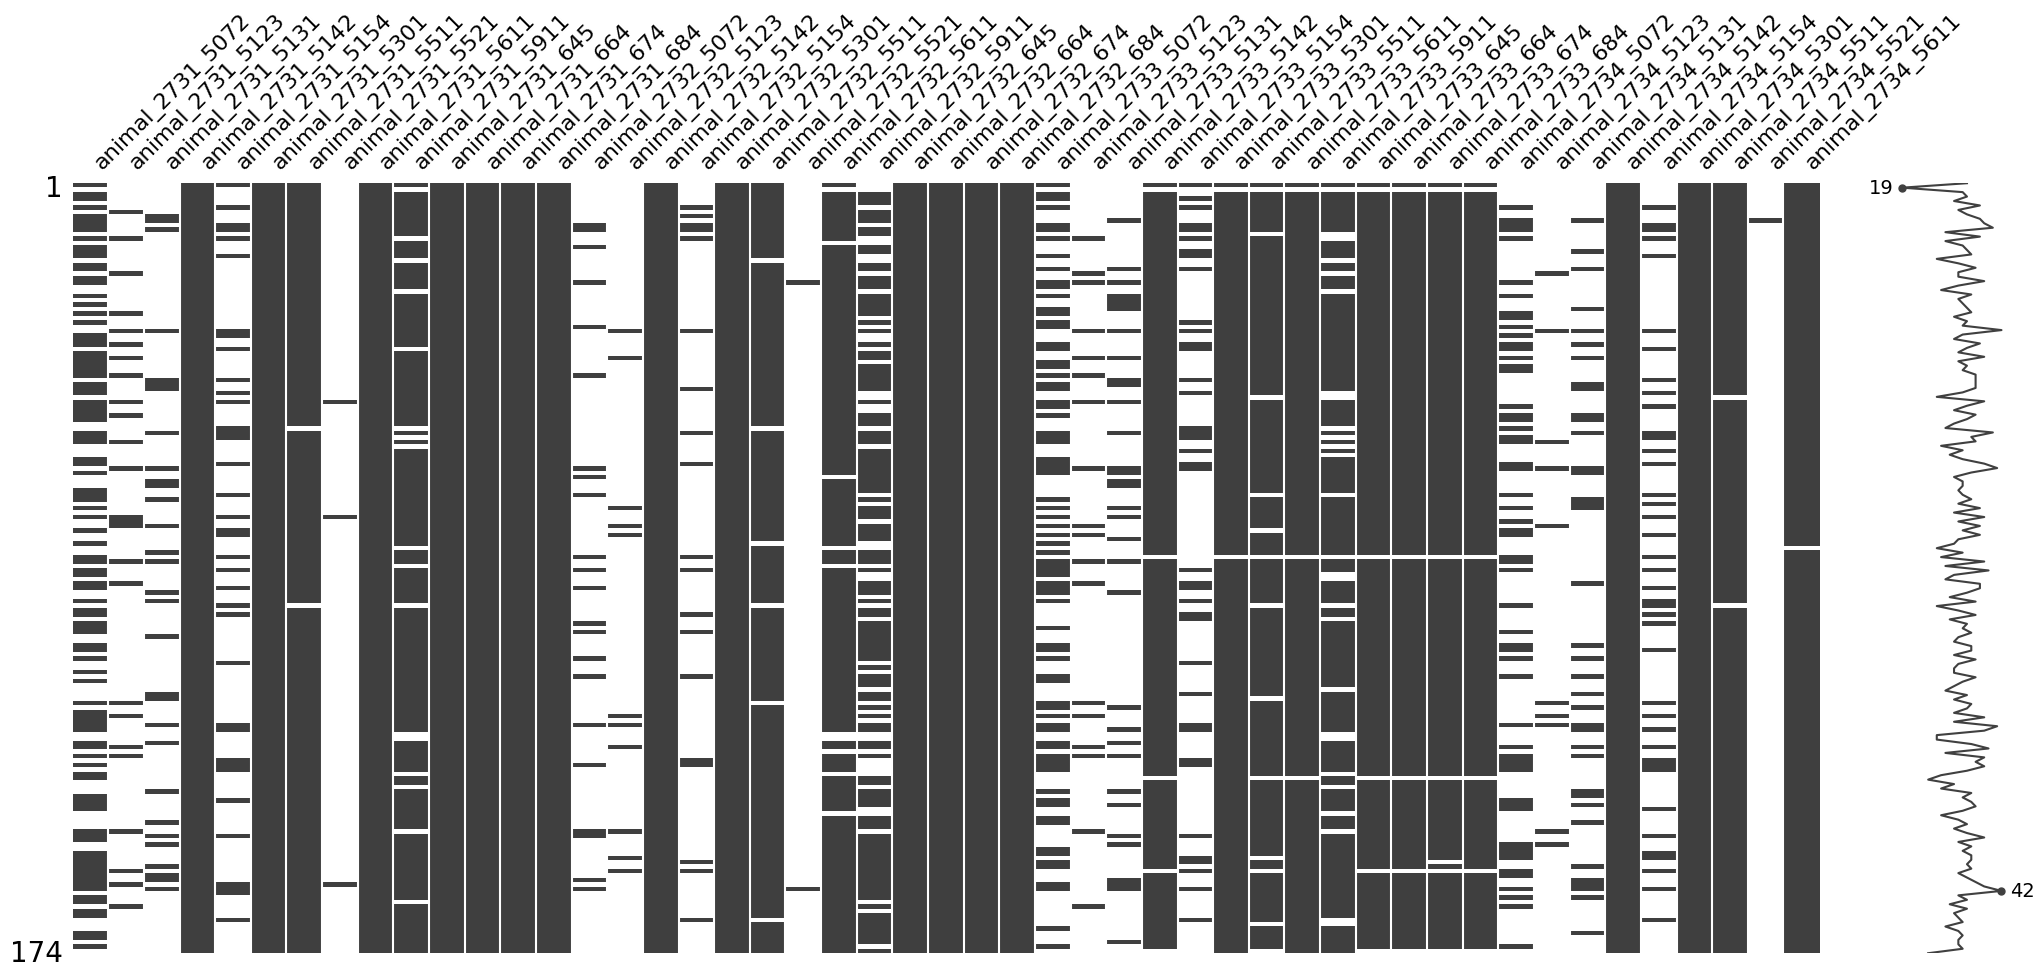

In [116]:
# Affichage des vides dans le df pivot
import missingno as msno
#! pip install missingno
msno.matrix(pivot.iloc[:,1:50])

<Axes: >

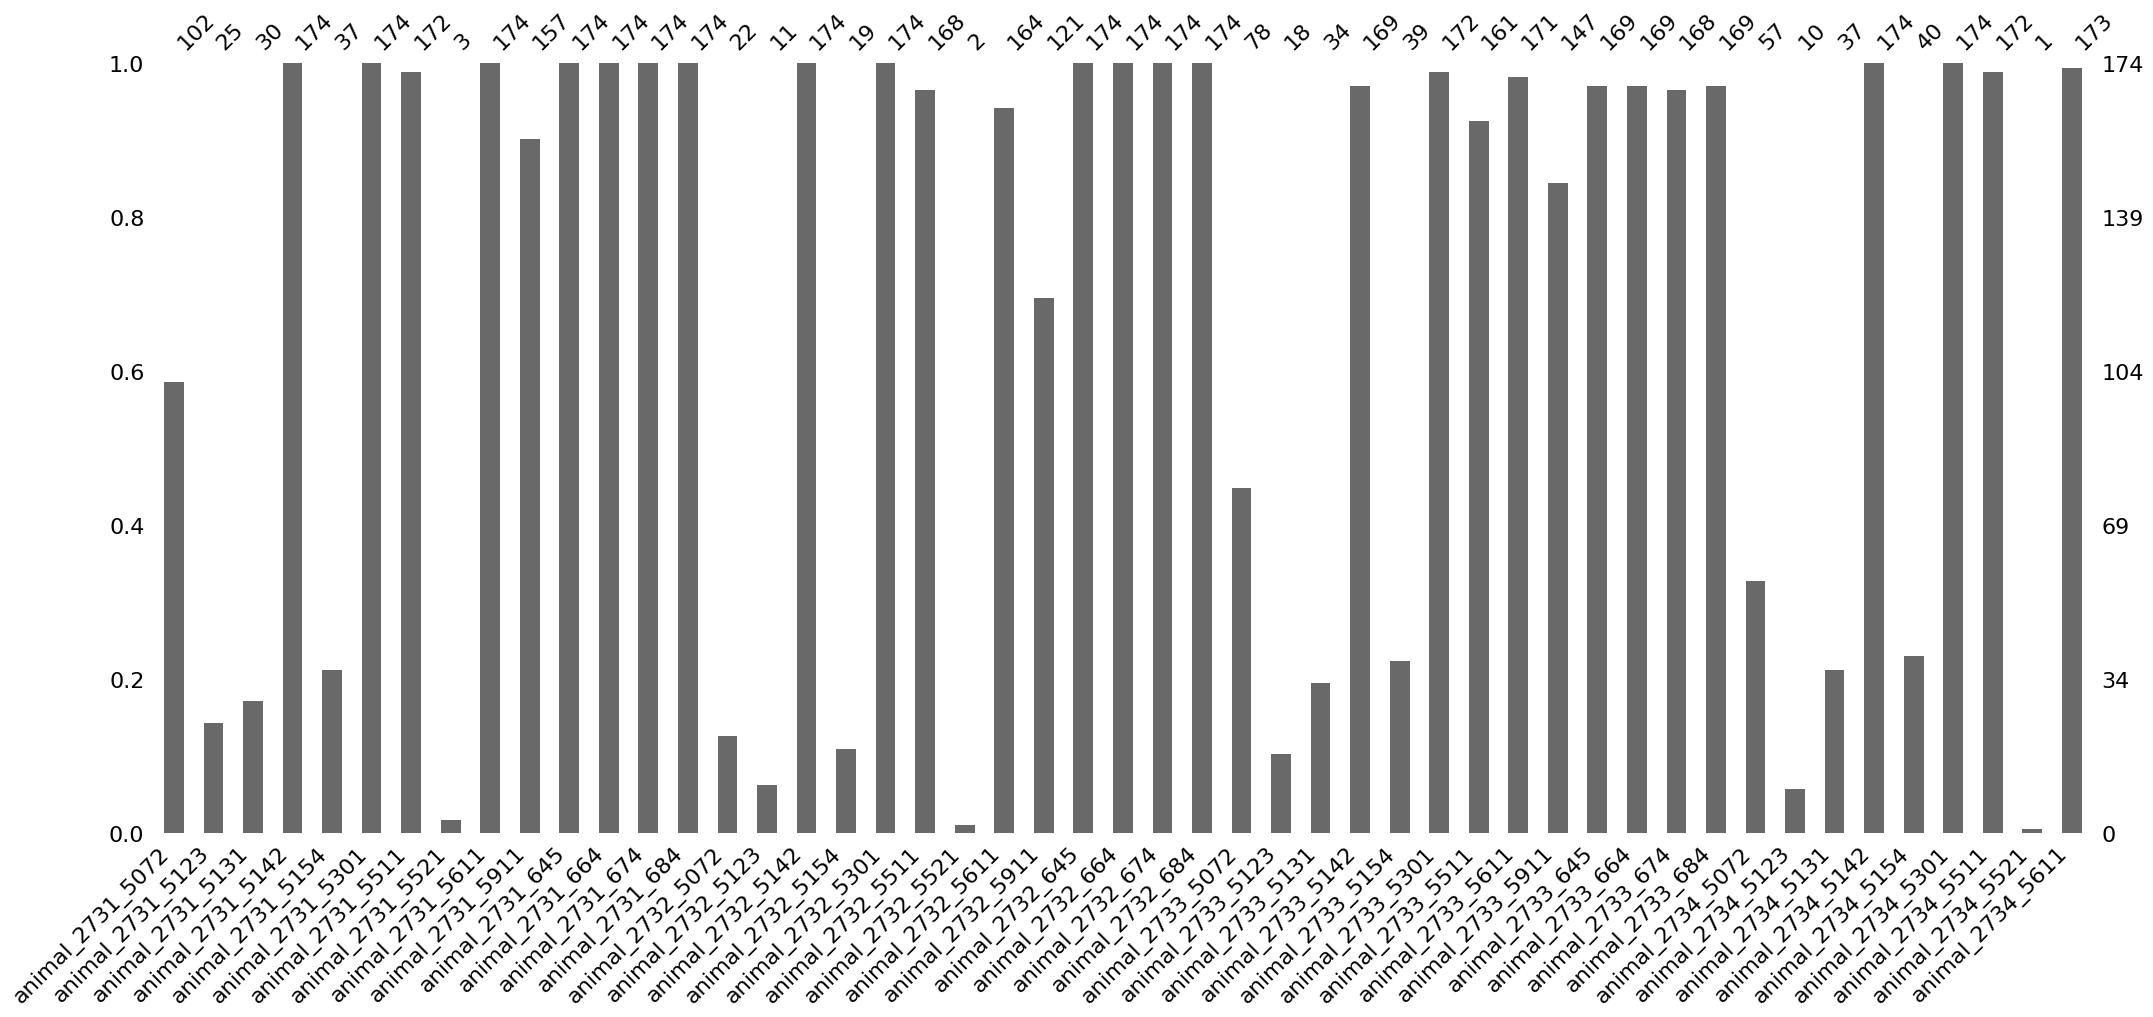

In [117]:
msno.bar(pivot.iloc[:,1:50])

<Axes: >

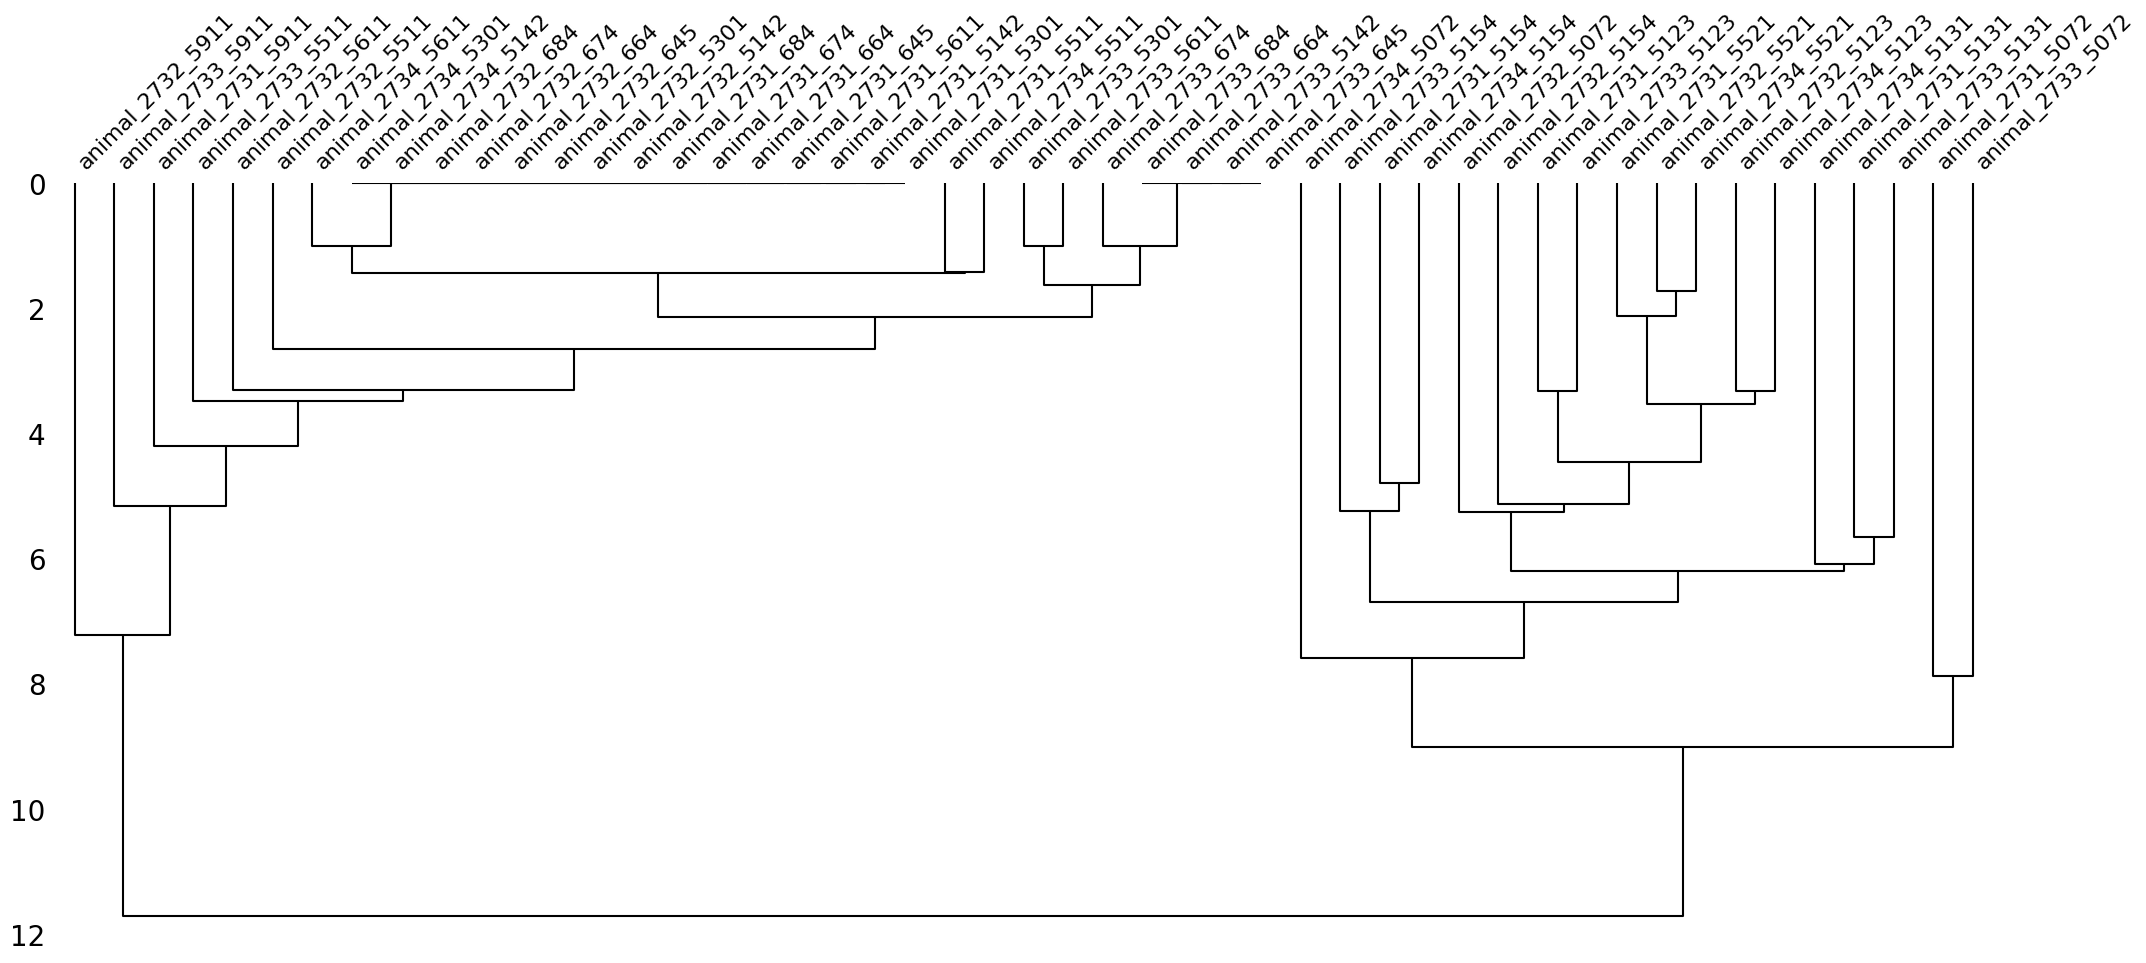

In [118]:
msno.dendrogram(pivot.iloc[:,1:50])

# Redondance Blé

In [119]:
# Vérification lien Blé prod, import, export...

pivot.rename(columns={  "cereal_2511_5511": "blé_prod"
                      , "cereal_2511_5611": "blé_import"
                      , "cereal_2511_5911": "blé_export"
                      , "cereal_2511_5301": "blé_dispo"
                      , "cereal_2511_5072": "blé_varia"
                      , "cereal_2511_5123": "blé_perte"
                      , "cereal_2511_664": "blé_dispo_kcal"
                      , "cereal_2511_674": "blé_dispo_g"
                      , "cereal_2511_5154": "blé_autre"
                     }, inplace=True)
          
# dispo = prod + import - export + variation
pivot['check'] = pivot.blé_prod + pivot.blé_import - pivot.blé_export + pivot.blé_varia \
                 - pivot.blé_dispo

pivot.check.fillna(0.0, inplace=True)

pivot[['Pays' # Pays
      ,'blé_prod', 'blé_import', 'blé_export', 'blé_dispo', 'blé_varia' 
       # Blé : Production, Importation, Exportation, disponibilité, variation de stock
      ,'check'  
      ,'blé_perte', 'blé_autre'
       # Blé : Pertes, Autre
      ]] [pivot.check!=0.0]  # .head(50) 

,Pays,blé_prod,blé_import,blé_export,blé_dispo,blé_varia,check,blé_perte,blé_autre
Code Pays,,,,,,,,,
4,Algeria,3299.0,6343.0,2.0,9461.0,-180.0,-1.0,672.0,820.0
7,Angola,4.0,972.0,0.0,898.0,-79.0,-1.0,23.0,NaN
10,Australia,22856.0,283.0,18171.0,6691.0,1724.0,1.0,229.0,920.0
19,Bolivia (Plurinational State of),209.0,286.0,5.0,583.0,94.0,1.0,31.0,0.0
21,Brazil,5718.0,7630.0,1288.0,12059.0,0.0,1.0,607.0,1.0
33,Canada,37530.0,818.0,20704.0,8381.0,-9262.0,1.0,21.0,664.0
41,"China, mainland",121926.0,5666.0,563.0,125247.0,-1783.0,-1.0,2990.0,2929.0
44,Colombia,8.0,1491.0,36.0,1464.0,0.0,-1.0,21.0,NaN
52,Azerbaijan,1893.0,1589.0,5.0,3484.0,6.0,-1.0,71.0,264.0


In [120]:
pivot.columns.to_list()

['Pays',
 'animal_2731_5072',
 'animal_2731_5123',
 'animal_2731_5131',
 'animal_2731_5142',
 'animal_2731_5154',
 'animal_2731_5301',
 'animal_2731_5511',
 'animal_2731_5521',
 'animal_2731_5611',
 'animal_2731_5911',
 'animal_2731_645',
 'animal_2731_664',
 'animal_2731_674',
 'animal_2731_684',
 'animal_2732_5072',
 'animal_2732_5123',
 'animal_2732_5142',
 'animal_2732_5154',
 'animal_2732_5301',
 'animal_2732_5511',
 'animal_2732_5521',
 'animal_2732_5611',
 'animal_2732_5911',
 'animal_2732_645',
 'animal_2732_664',
 'animal_2732_674',
 'animal_2732_684',
 'animal_2733_5072',
 'animal_2733_5123',
 'animal_2733_5131',
 'animal_2733_5142',
 'animal_2733_5154',
 'animal_2733_5301',
 'animal_2733_5511',
 'animal_2733_5611',
 'animal_2733_5911',
 'animal_2733_645',
 'animal_2733_664',
 'animal_2733_674',
 'animal_2733_684',
 'animal_2734_5072',
 'animal_2734_5123',
 'animal_2734_5131',
 'animal_2734_5142',
 'animal_2734_5154',
 'animal_2734_5301',
 'animal_2734_5511',
 'animal_2734_55

# Blé, kcal

[29.63212635 38.11688312]
[25.38974796390051, 50.84401826986572]


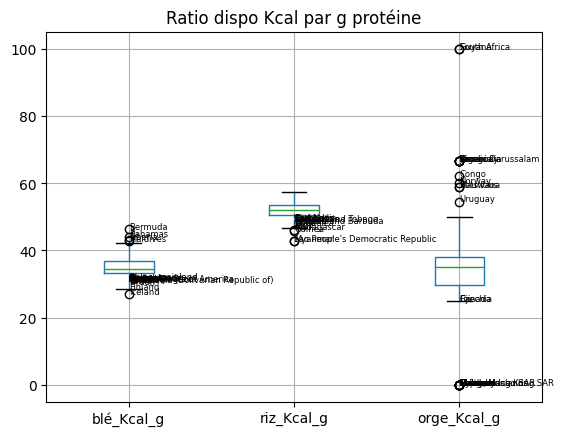

In [169]:
# Valeur energétique (blé 2511 ) Orge 2513, Riz 2805
# 664: Disponibilité alimentaire (Kcal/personne/jour)
# 511: Total Population - Both sexes

pivot.rename(columns={  "cereal_2511_664": "blé_dispo_kcal"
                      , "cereal_2511_674": "blé_dispo_g"
                      , "cereal_2805_664": "riz_dispo_kcal"
                      , "cereal_2805_674": "riz_dispo_g"
                     }, inplace=True)


#pivot['blé_Kcal'] = pivot['blé_dispo_kcal'] * pivot.population_2501_511
pivot['blé_Kcal_g'] = pivot['blé_dispo_kcal'] / pivot['blé_dispo_g'] #/ 0.1 # 10% de protéine par gramme
pivot['riz_Kcal_g'] = pivot['riz_dispo_kcal'] / pivot['riz_dispo_g'] #/ 0.025 # 2.5% proteine / g
pivot['orge_Kcal_g'] = pivot['cereal_2513_664'] / pivot['cereal_2513_674']
#print(pivot[['Pays','blé_Kcal_g','blé_dispo_kcal','blé_dispo_g']])
#pivot.boxplot(column=['blé_Kcal', 'blé_dispo_alim'])
x= pivot.boxplot(column=['blé_Kcal_g', 'riz_Kcal_g', 'orge_Kcal_g'])
plt.title('Ratio dispo Kcal par g protéine')
#pivot.boxplot(column=[ 'blé_dispo_alim'])

orge_quantile = pivot['orge_Kcal_g'].quantile([0.25, 0.75]).to_numpy()
blé_quantile = pivot['blé_Kcal_g'].quantile([0.25, 0.75]).to_numpy()
riz_quantile = pivot['riz_Kcal_g'].quantile([0.25, 0.75]).to_numpy()
print(orge_quantile)
orge_outlier = [orge_quantile[1] - 1.5 * (orge_quantile[1] - orge_quantile[0]), orge_quantile[1] + 1.5 * (orge_quantile[1] - orge_quantile[0])]
blé_outlier = [blé_quantile[1] - 1.5 * (blé_quantile[1] - blé_quantile[0]), blé_quantile[1] + 1.5 * (blé_quantile[1] - blé_quantile[0])]
riz_outlier = [riz_quantile[1] - 1.5 * (riz_quantile[1] - riz_quantile[0]), riz_quantile[1] + 1.5 * (riz_quantile[1] - riz_quantile[0])]
print(orge_outlier)

for i,r in pivot.iterrows():
    pass
    if r['blé_Kcal_g'] < blé_outlier[0] or r['blé_Kcal_g']>blé_outlier[1]:
        plt.text(1.0, r['blé_Kcal_g'], r['Pays'], fontsize=6)
    if r['riz_Kcal_g'] < riz_outlier[0] or r['riz_Kcal_g']>riz_outlier[1]:
        plt.text(2.0, r['riz_Kcal_g'], r['Pays'], fontsize=6)
    if r['orge_Kcal_g'] < orge_outlier[0] or r['orge_Kcal_g']>orge_outlier[1]:
        plt.text(3.0, r['orge_Kcal_g'], r['Pays'], fontsize=6)
        #plt.text('xxx', val, f' {row[0].year % 100:02d}', ha='left', va='center')
    #print(i, r)
#print(x)


Pop total: 6997326.0


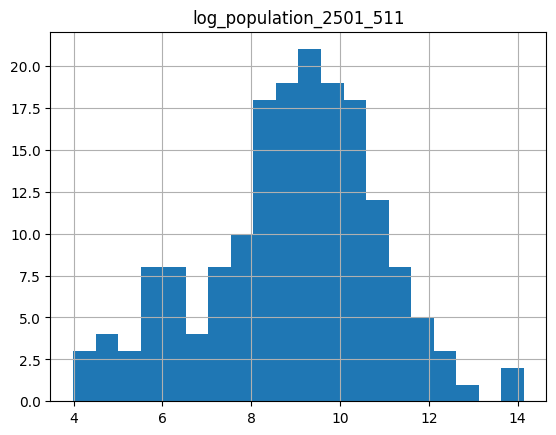

In [19]:
# Histogramme population
pivot['log_population_2501_511'] = np.log(pivot.population_2501_511)

pivot[['log_population_2501_511']].hist(bins=20)
#pivot[['population_2501_511']].plot(kind='hist', bins=50, logx=True)

pivot[['Pays', 'population_2501_511', 'log_population_2501_511']]
print('Pop total:', pivot.population_2501_511.sum())

In [20]:
from scipy.stats import shapiro
x, pval = shapiro(pivot.log_population_2501_511)
print('test shapiro, pval=', pval, ", doit être supérieur à 0.05 pour rester sur l'hypothèse nulle d'une distribution normale")

test shapiro, pval= 0.023842722177505493 , doit être supérieur à 0.05 pour rester sur l'hypothèse nulle d'une distribution normale


<Axes: >

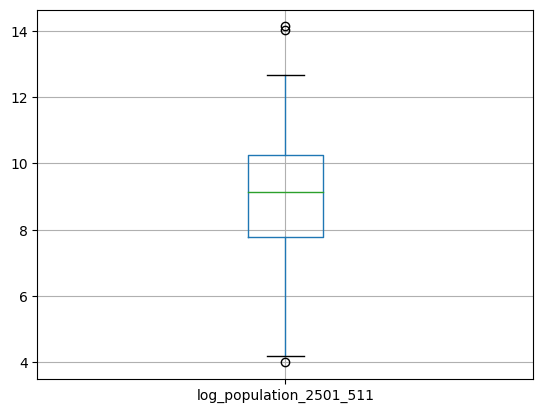

In [21]:
# Boxplot population
pivot.boxplot(column=['log_population_2501_511'])

/home/goudot/miniconda3/envs/dataIA/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


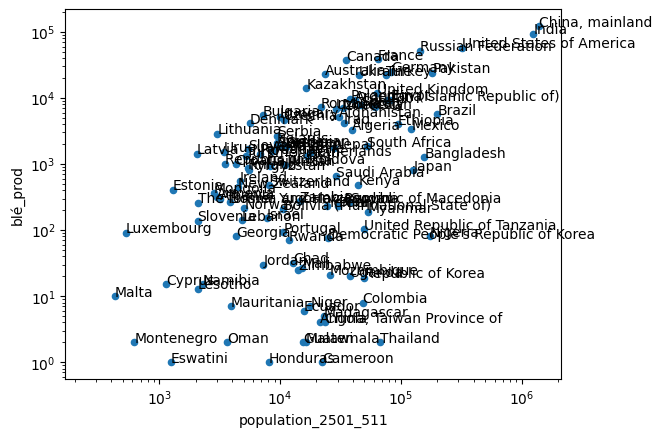

In [22]:
# Lien entre Blé pro & population
pivot['log_population_2501_511'] = np.log(pivot.population_2501_511)
pivot['log_blé_prod'] = np.log(pivot.blé_prod)

# https://stackoverflow.com/questions/18773662/scatter-plot-logarithmic-scale

ax = pivot.plot.scatter(x='population_2501_511', y='blé_prod')
ax.set_yscale('log')
ax.set_xscale('log')

for idx,row in pivot.iterrows():
    #print(x,y,pays)
    ax.annotate(row['Pays'], (row['population_2501_511'], row['blé_prod']))

<Axes: xlabel='blé_prod', ylabel='orge_prod'>

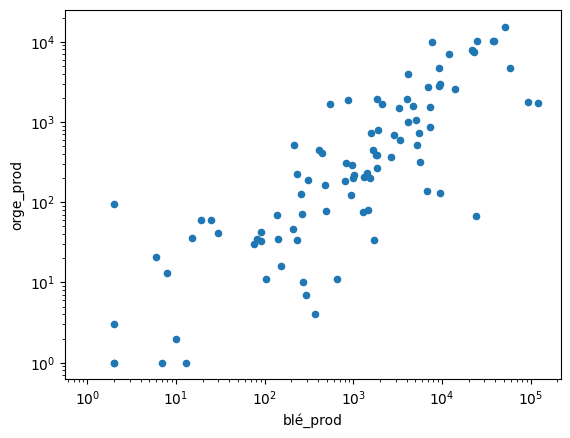

In [23]:
# Lien entre prod blé & orge ???

pivot.rename(columns={"cereal_2513_5511": "orge_prod"
                     }, inplace=True)
#pivot[['Pays','noix_prod','olive_prod']]
pivot.orge_prod

pivot.fillna(0.0, inplace=True)

pivot['log_blé_prod'] = np.log(1.0+pivot.blé_prod)
pivot['log_orge_prod'] = np.log(1.0+pivot.orge_prod)

ax = pivot.plot.scatter(x='blé_prod', y='orge_prod')
ax.set_yscale('log')
ax.set_xscale('log')
ax

In [24]:
pivot[['blé_prod', 'orge_prod', 'log_blé_prod', 'log_orge_prod']].corr()

,blé_prod,orge_prod,log_blé_prod,log_orge_prod
blé_prod,1.000000,0.517053,0.498429,0.449007
orge_prod,0.517053,1.000000,0.541565,0.631061
log_blé_prod,0.498429,0.541565,1.000000,0.908904
log_orge_prod,0.449007,0.631061,0.908904,1.000000


In [25]:
# corrélation sur 10 colonnes
pivot.iloc[:,1:11].corr()

,animal_2731_5072,animal_2731_5123,animal_2731_5131,animal_2731_5142,animal_2731_5154,animal_2731_5301,animal_2731_5511,animal_2731_5521,animal_2731_5611,animal_2731_5911
animal_2731_5072,1.000000,-0.014598,0.010741,-0.031646,0.007824,-0.031839,-0.022709,-0.010741,-0.003324,0.040934
animal_2731_5123,-0.014598,1.000000,0.005634,0.124322,-0.019787,0.142445,0.140925,0.052029,0.008138,0.040370
animal_2731_5131,0.010741,0.005634,1.000000,0.020303,0.018527,0.021561,0.021384,0.005780,0.017674,0.016052
animal_2731_5142,-0.031646,0.124322,0.020303,1.000000,-0.033789,0.999829,0.981881,0.000573,0.638193,0.585513
animal_2731_5154,0.007824,-0.019787,0.018527,-0.033789,1.000000,-0.032244,-0.038643,0.128003,-0.010226,-0.049417
animal_2731_5301,-0.031839,0.142445,0.021561,0.999829,-0.032244,1.000000,0.982049,0.002322,0.636713,0.584679
animal_2731_5511,-0.022709,0.140925,0.021384,0.981881,-0.038643,0.982049,1.000000,-0.000304,0.540234,0.710742
animal_2731_5521,-0.010741,0.052029,0.005780,0.000573,0.128003,0.002322,-0.000304,1.000000,-0.012957,-0.020651
animal_2731_5611,-0.003324,0.008138,0.017674,0.638193,-0.010226,0.636713,0.540234,-0.012957,1.000000,0.274843
animal_2731_5911,0.040934,0.040370,0.016052,0.585513,-0.049417,0.584679,0.710742,-0.020651,0.274843,1.000000


In [26]:
x=pivot.log_blé_prod.to_numpy()
y=pivot.log_orge_prod.to_numpy()
z = np.polyfit(x, y, 1)

z # log_orge_prod = log_blé_prod * 0.77 - 0.16

array([ 0.77966441, -0.16372372])

<Axes: >

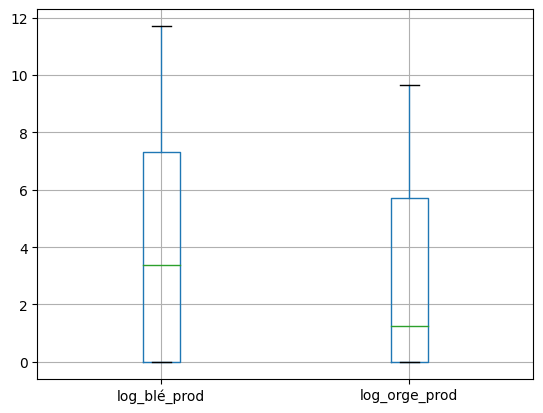

In [27]:
#pivot.boxplot(column=['blé_prod', 'orge_prod'])
pivot.boxplot(column=['log_blé_prod', 'log_orge_prod'])


In [28]:
list(filter(lambda x: ('21001' in x), pivot.columns))
pivot[['Pays','population_2501_511', 'sous_alimentation_21001_6132']]

,Pays,population_2501_511,sous_alimentation_21001_6132
Code Pays,,,
1,Armenia,2977.0,0.1
2,Afghanistan,30552.0,8.1
3,Albania,3173.0,0.2
4,Algeria,39208.0,1.8
7,Angola,21472.0,8.0
...,...,...,...
255,Belgium,11104.0,0.0
256,Luxembourg,530.0,0.0
272,Serbia,9511.0,0.5


In [29]:
# Sous alimentation : % par pays ?

list(filter(lambda x: ('21001' in x), pivot.columns))
pivot[['population_2501_511', 'sous_alimentation_21001_6132']]
pivot['ss_alim'] = pivot.sous_alimentation_21001_6132 / pivot.population_2501_511 * 100.0
pivot[['Pays', 'population_2501_511', 'sous_alimentation_21001_6132', 'ss_alim']] \
    .sort_values(by='ss_alim', ascending=False) \
    .head(20)


,Pays,population_2501_511,sous_alimentation_21001_6132,ss_alim
Code Pays,,,,
93,Haiti,10317.0,5.2,0.050402
251,Zambia,14539.0,7.0,0.048146
181,Zimbabwe,14150.0,6.7,0.047350
37,Central African Republic,4616.0,2.1,0.045494
116,Democratic People's Republic of Korea,24895.0,10.4,0.041775
46,Congo,4448.0,1.8,0.040468
39,Chad,12825.0,4.9,0.038207
123,Liberia,4294.0,1.6,0.037261
7,Angola,21472.0,8.0,0.037258


sous_alim
(-0.01, 1.0]    131
(1.0, 2.0]       24
(2.0, 3.0]       14
(3.0, 4.0]        3
(4.0, 5.0]        2
Name: count, dtype: int64
blé
(-0.0, 2.0]    78
(7.0, 9.0]     37
(5.0, 7.0]     28
(2.0, 5.0]     18
(9.0, 12.0]    13
Name: count, dtype: int64


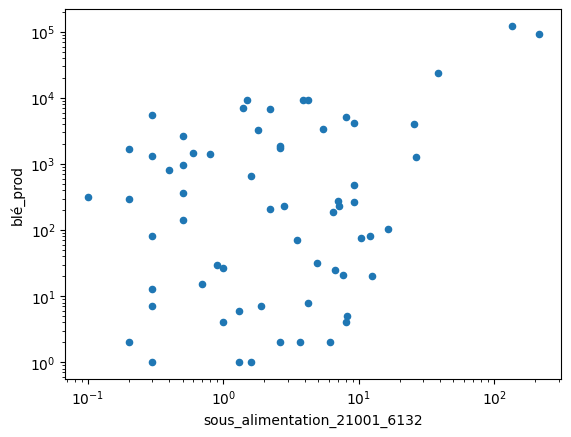

In [30]:
#pivot['sous_alim']=(pivot.sous_alimentation_21001_6132 > 1.0).astype("category")
pivot['sous_alim']=pd.cut(np.log(1.0+pivot.sous_alimentation_21001_6132), 5, precision=0)
pivot['blé']=pd.cut(pivot.log_blé_prod, 5, precision=0)

ax = pivot.plot.scatter(x='sous_alimentation_21001_6132', y='blé_prod')
ax.set_yscale('log')
ax.set_xscale('log')
pivot[['Pays', 'sous_alim', 'blé']].head(20)

print(pivot['sous_alim'].value_counts())
print(pivot['blé'].value_counts())

In [31]:
matrice = pd.crosstab(pivot.blé, pivot.sous_alim)
matrice

sous_alim,"(-0.01, 1.0]","(1.0, 2.0]","(2.0, 3.0]","(3.0, 4.0]","(4.0, 5.0]"
blé,,,,,
"(-0.0, 2.0]",63,10,5,0,0
"(2.0, 5.0]",10,3,5,0,0
"(5.0, 7.0]",21,5,2,0,0
"(7.0, 9.0]",27,6,2,2,0
"(9.0, 12.0]",10,0,0,1,2


In [32]:
from scipy.stats import chi2_contingency as chi2_contingency

In [33]:
khi2, pval , ddl , contingent_theorique = chi2_contingency(matrice)
khi2, pval , ddl , contingent_theorique
print('pval=', pval)
# p-value est inférieur à 0,05 -> il y a un lien, il y a dépendance.

pval= 7.898453967462346e-05


In [34]:
g, p, dof, expctd = chi2_contingency(matrice, lambda_="log-likelihood")

print("G={}; df={}; P={}".format(g, dof, p)) # p : p-value
# p est inférieure à 0.05, on va en déduire qu'il y a une répartition inégale des sous alim et blé

G=31.546566138775965; df=16; P=0.011448761387250194


In [35]:
# https://stackoverflow.com/questions/51695769/sklearn-chi2-for-feature-selection

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np

# Load iris data
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

# Convert to categorical data by converting data to integers
X = X.astype(int)

# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
chi2_selector.fit(X, y)

# Look at scores returned from the selector for each feature
chi2_scores = pd.DataFrame(list(zip(iris.feature_names, chi2_selector.scores_, chi2_selector.pvalues_)), columns=['ftr', 'score', 'pval'])
chi2_scores

# you can see that the kbest returned from SelectKBest 
#+ were the two features with the _highest_ score
kbest = np.asarray(iris.feature_names)[chi2_selector.get_support()]
kbest

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')